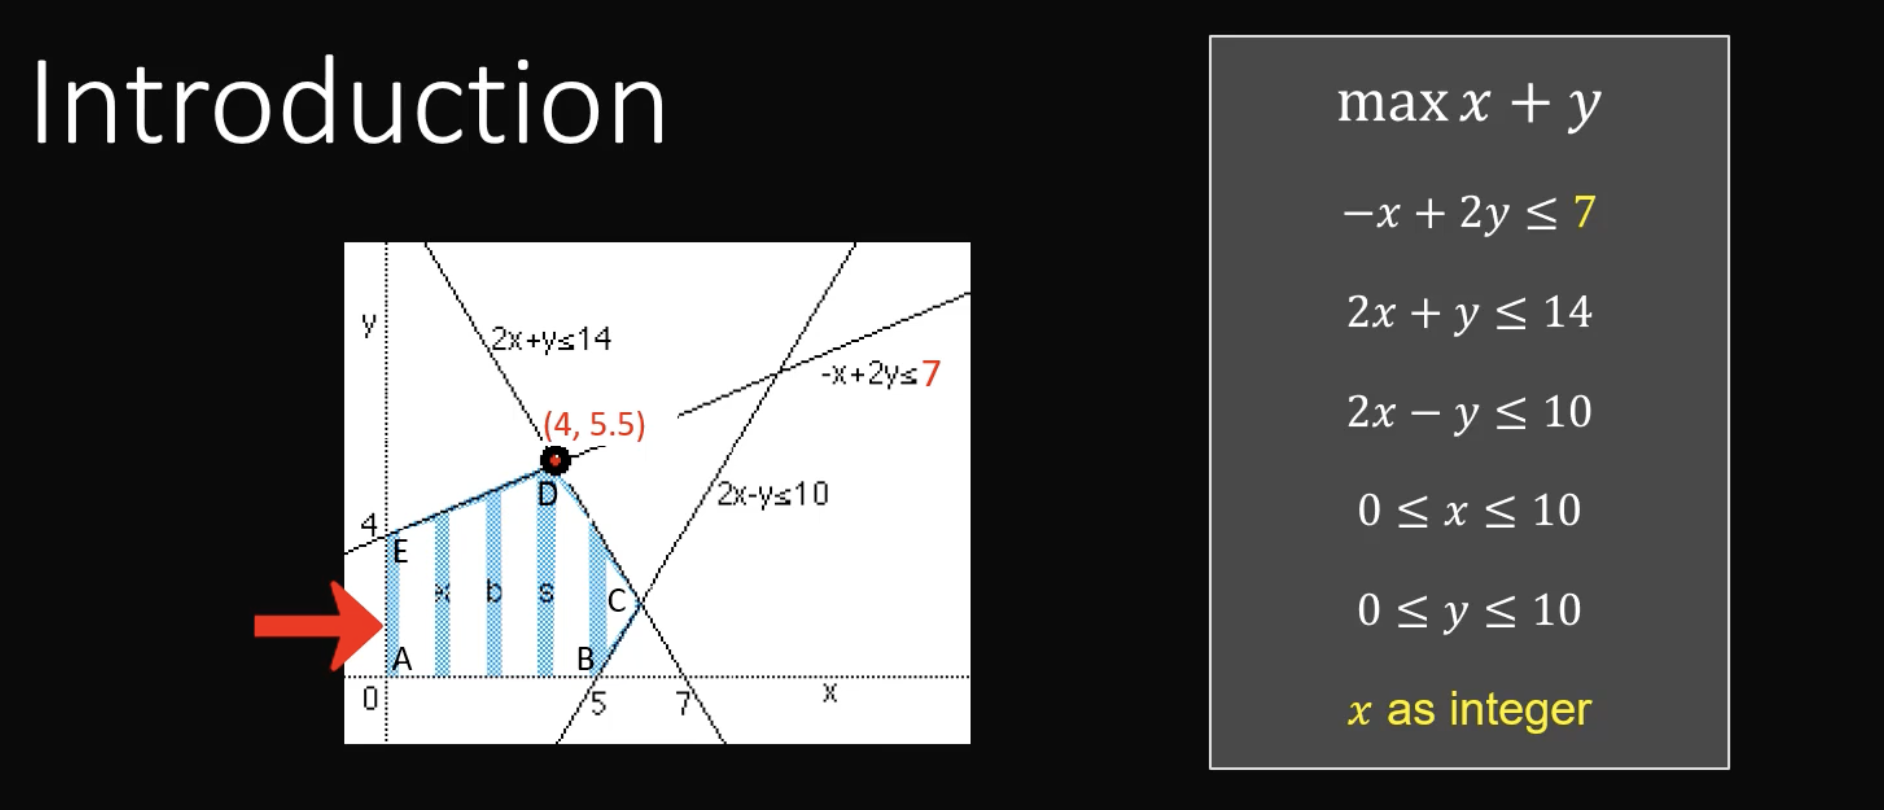

In [1]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()

model.x = pyo.Var(within=Integers, bounds=(0,10))
model.y = pyo.Var(bounds=(0,10))
x = model.x
y = model.y

model.C1 = pyo.Constraint(expr= -x+2*y<=7)
model.C2 = pyo.Constraint(expr= 2*x+y<=14)
model.C3 = pyo.Constraint(expr= 2*x-y<=10)

model.obj = pyo.Objective(expr= x+y, sense=maximize)

opt = SolverFactory("cbc")
opt.solve(model)

model.pprint()

x_value = pyo.value(x)
y_value = pyo.value(y)

print('\n---------------------------------------------------------------------')
print('x=',x_value)
print('y=',y_value)

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   4.0 :    10 : False : False : Integers
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   5.5 :    10 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x + y

3 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  -Inf : - x + 2*y :   7.0 :   True
    C2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y :  14.0 :   True
    C3 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x - y :  10.0 :   True

6 Declarations: x y C1 C2 C3 obj

---------------------------------------------

## MILP Exercise 2 

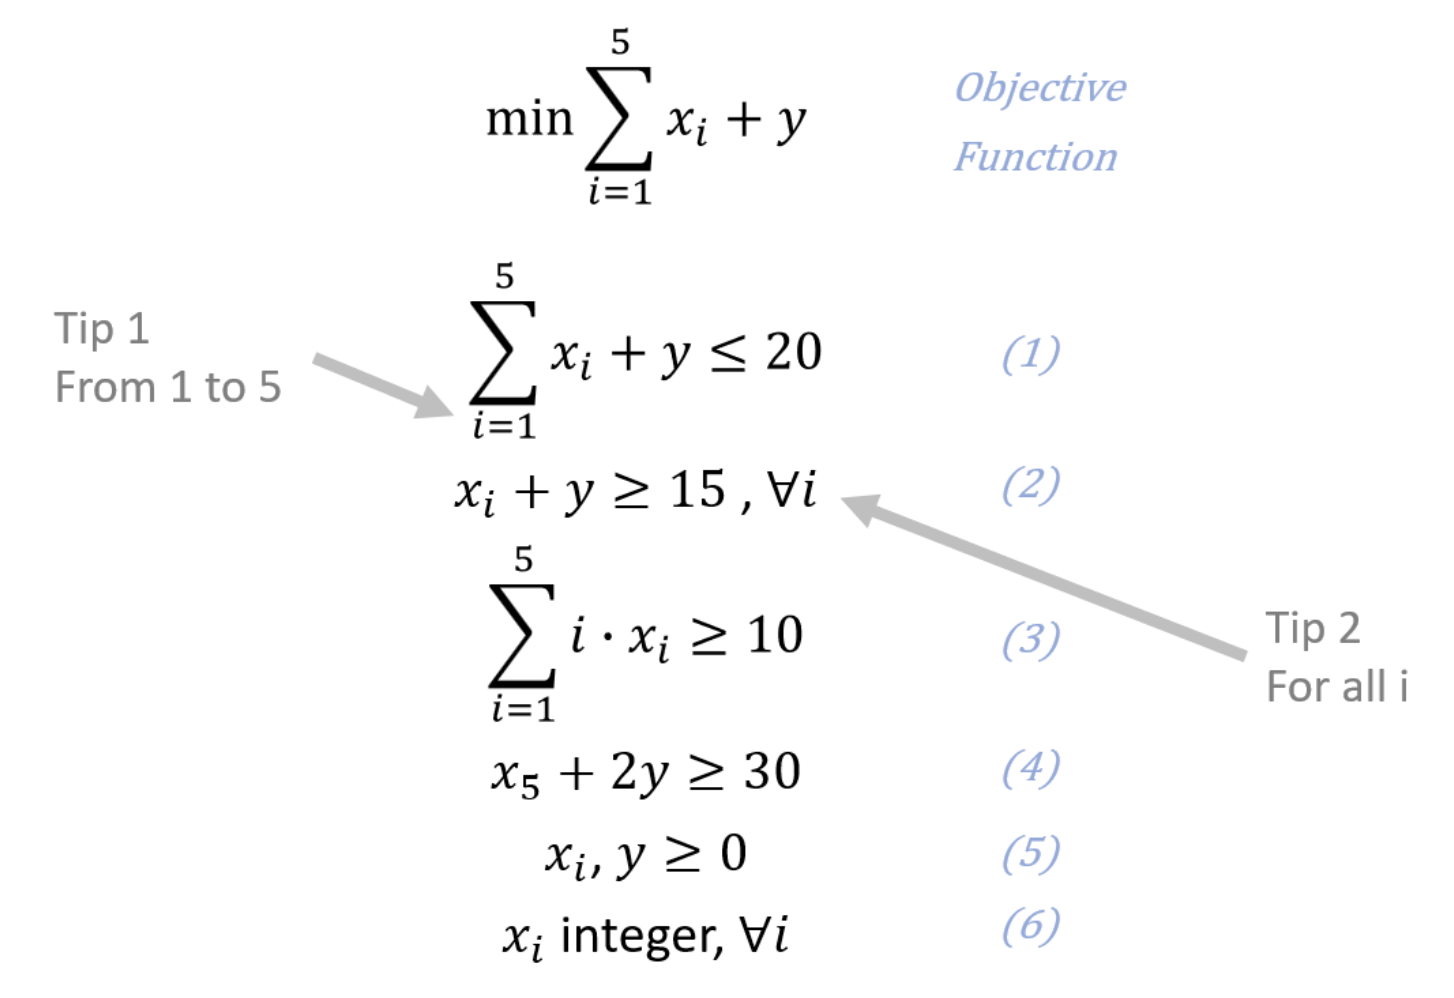

In [2]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()

range_i = range(1, 6)

# Creating x variables and its summation.
model.x = pyo.Var(range_i, within=Integers, bounds=(0, None))
x = model.x
x_sum = sum([x[i] for i in range_i])

# Creating y variables.
model.y = pyo.Var(bounds=(0,None))
y = model.y

# Constraint 1:
model.C1 = pyo.Constraint(expr = x_sum + y <= 20)

# Constraint 2:
model.C2 = pyo.ConstraintList()
for i in range_i:
    model.C2.add(expr = x[i] + y >= 15)

# Constraint 3:
C3_sum = sum(i * x[i] for i in range_i)
model.C3 = pyo.Constraint(expr = C3_sum >= 10)
#model.C3 = pyo.Constraint(expr = 1*x[1] + 2*x[2] + 3*x[3] + 4*x[4] + 5*x[5] >= 10)

# Constraint 4:
model.C4 = pyo.Constraint(expr= x[5] + 2*y >= 30)    
    
# Minimization:  
model.obj = pyo.Objective(expr= x_sum + y, sense=minimize)

#cost_sum = sum([Pg[g]*dataGen.cost[g] for g in dataGen.id])
#model.obj = pyo.Objective(expr = cost_sum, sense = minimize)

opt = SolverFactory("cbc")
opt.solve(model)

model.pprint()

2 Set Declarations
    C2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}

2 Var Declarations
    x : Size=5, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :  None : False : False : Integers
          2 :     0 :   0.0 :  None : False : False : Integers
          3 :     0 :   0.0 :  None : False : False : Integers
          4 :     0 :   0.0 :  None : False : False : Integers
          5 :     0 :   2.0 :  None : False : False : Integers
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  15.0 :  None : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sen

In [3]:
import numpy as np

optimal_x_sum = 0
for g in range_i:
    print(f"The value of {x[g]} = {pyo.value(x[g])}")
    optimal_x_sum += pyo.value(x[g])
optimal_x_sum += pyo.value(y)
y_value = pyo.value(y)
print('y =:',y_value)
print('---------------------------------------------------------------------')
print(f"The minimum value of the objective function is {optimal_x_sum}")

The value of x[1] = 0.0
The value of x[2] = 0.0
The value of x[3] = 0.0
The value of x[4] = 0.0
The value of x[5] = 2.0
y =: 15.0
---------------------------------------------------------------------
The minimum value of the objective function is 17.0
